In [5]:
'Link: https://tradewithpython.com/generating-buy-sell-signals-using-python'

import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date
pd.set_option('display.max_rows', 100)

In [6]:
plt.style.use('fivethirtyeight')
yf.pdr_override()

symbol = ['GOOG']
start_date = date(2017, 8, 4)
end_date = date.today()
print(end_date)

def getMyPortfolio(stocks = symbol, start = start_date, end = end_date):
    data = web.get_data_yahoo(stocks, start = start, end = end)
    return data

data = getMyPortfolio(symbol)
data

2023-06-07
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-04,46.337502,46.515350,46.151501,46.397999,46.397999,21646000
2017-08-07,46.452999,46.584999,46.325001,46.467999,46.467999,20644000
2017-08-08,46.354500,46.790699,46.280499,46.339500,46.339500,21232000
2017-08-09,46.030499,46.299000,45.862499,46.145000,46.145000,23842000
2017-08-10,45.877499,45.963001,45.306499,45.362000,45.362000,36480000
...,...,...,...,...,...,...
2023-05-31,123.699997,124.900002,123.099998,123.370003,123.370003,41548800
2023-06-01,123.500000,125.040001,123.300003,124.370003,124.370003,25017700
2023-06-02,124.489998,126.745003,124.349998,125.230003,125.230003,19362400


In [7]:
data['SMA 30'] = ta.sma(data['Close'], 30)
data['SMA 100'] = ta.sma(data['Close'], 100)

def buy_sell(data):
    signalBuy = []
    signalSell = []
    position = False

    for i in range(len(data)):
        if data['SMA 30'][i] > data['SMA 100'][i]:
            if position == False:
                signalBuy.append(data['Adj Close'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
    
        elif data['SMA 30'][i] < data['SMA 100'][i]:
            if position == True:
                signalBuy.append(np.nan)
                signalSell.append(data['Adj Close'][i])
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)

    return pd.Series([signalBuy, signalSell])

In [8]:
data['Buy_Signal_Price'], data['Sell_Signal_Price'] = buy_sell(data)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2017-08-04,46.337502,46.515350,46.151501,46.397999,46.397999,21646000,NaN,NaN,NaN,NaN
2017-08-07,46.452999,46.584999,46.325001,46.467999,46.467999,20644000,NaN,NaN,NaN,NaN
2017-08-08,46.354500,46.790699,46.280499,46.339500,46.339500,21232000,NaN,NaN,NaN,NaN
2017-08-09,46.030499,46.299000,45.862499,46.145000,46.145000,23842000,NaN,NaN,NaN,NaN
2017-08-10,45.877499,45.963001,45.306499,45.362000,45.362000,36480000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-05-31,123.699997,124.900002,123.099998,123.370003,123.370003,41548800,113.922167,103.10385,NaN,NaN
2023-06-01,123.500000,125.040001,123.300003,124.370003,124.370003,25017700,114.567167,103.46595,NaN,NaN
2023-06-02,124.489998,126.745003,124.349998,125.230003,125.230003,19362400,115.211500,103.83025,NaN,NaN


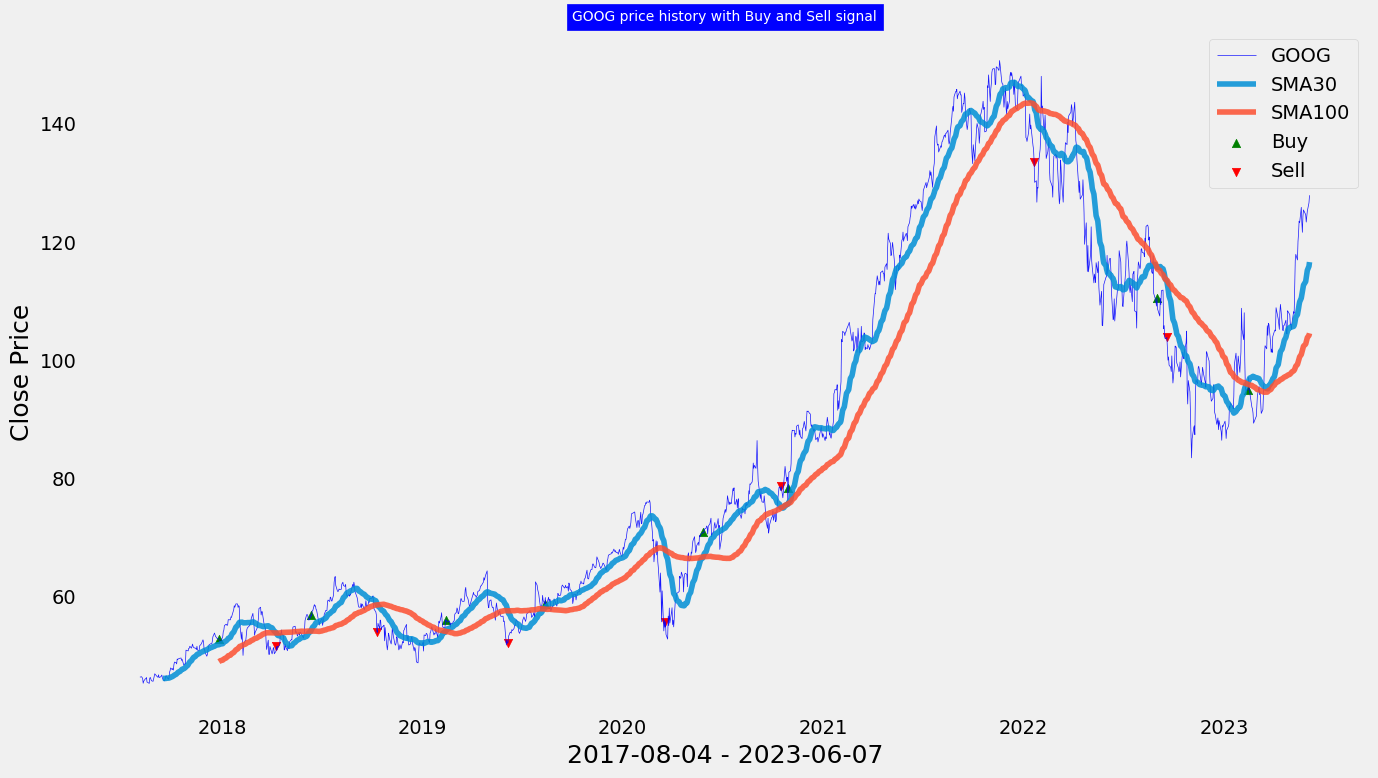

In [15]:
fig, ax = plt.subplots(figsize = (14,8))
ax.plot(data['Adj Close'], label = symbol[0], linewidth = 0.5, color = 'blue', alpha = 0.9)
ax.plot(data['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(data['SMA 100'], label = 'SMA100', alpha = 0.85)

ax.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green', alpha = 1)
ax.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red', alpha = 1)
ax.set_title(symbol[0] + " price history with Buy and Sell signal", fontsize = 10, backgroundcolor = 'blue', color = 'white')
ax.set_xlabel(f'{start_date} - {end_date}', fontsize = 18)
ax.set_ylabel('Close Price', fontsize = 18)

legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [16]:
macd = ta.macd(data['Close'])
macd

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
2017-08-04,NaN,NaN,NaN
2017-08-07,NaN,NaN,NaN
2017-08-08,NaN,NaN,NaN
2017-08-09,NaN,NaN,NaN
2017-08-10,NaN,NaN,NaN
...,...,...,...
2023-05-31,4.706057,0.153153,4.552904
2023-06-01,4.563355,0.008361,4.554994
2023-06-02,4.468152,-0.069473,4.537626


In [17]:
data = pd.concat([data, macd], axis=1).reindex(data.index)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_Price,Sell_Signal_Price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,,,,,,,,,,,
2017-08-04,46.337502,46.515350,46.151501,46.397999,46.397999,21646000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-07,46.452999,46.584999,46.325001,46.467999,46.467999,20644000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-08,46.354500,46.790699,46.280499,46.339500,46.339500,21232000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-09,46.030499,46.299000,45.862499,46.145000,46.145000,23842000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-10,45.877499,45.963001,45.306499,45.362000,45.362000,36480000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,123.699997,124.900002,123.099998,123.370003,123.370003,41548800,113.922167,103.10385,NaN,NaN,4.706057,0.153153,4.552904
2023-06-01,123.500000,125.040001,123.300003,124.370003,124.370003,25017700,114.567167,103.46595,NaN,NaN,4.563355,0.008361,4.554994
2023-06-02,124.489998,126.745003,124.349998,125.230003,125.230003,19362400,115.211500,103.83025,NaN,NaN,4.468152,-0.069473,4.537626


In [ ]:
def MACD_Strategy(df, risk):
    MACD_Buy = []
    MACD_Sell = []
    position = False

    for i in range(0, len(df)):
        if df['MACD_12_26_9'][i] > df['MACDs_12_26_9'][i]:
            MACD_Sell.append(np.nan)
            if position == False:
                MACD_Buy.append(df['Adj Close'][i])
                position = True
            else:
                MACD_Buy.append(np.nan)
        
        elif df['MACD_12_26_9'][i] < df['MACDs_12_26_9'][i]:
            MACD_Buy.append(np.nan)
            if position == True:
                MACD_Sell.append(df['Adj Close'][i])
                position == False
            else:
                MACD_Sell.append(np.nan)
        
        elif position == True and df['Adj Close'][i] < MACD_Buy[-1] * (1-risk):
            MACD_Sell.append(df['Adj Close'][i])
            MACD_Buy.append(np.nan)
            position = False

        elif 